In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define constants

In [2]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 3
EPOCHS = 20

# Data augmentation and normalization

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load and augment training data

In [4]:
train_generator = train_datagen.flow_from_directory(
    '../../datasets/meme_dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Training subset
)

Found 213 images belonging to 3 classes.


# Load and augment validation data

In [5]:
validation_generator = train_datagen.flow_from_directory(
    '../../datasets/meme_dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 52 images belonging to 3 classes.


# Create a convolutional neural network

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [8]:
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 1.1856 - accuracy: 0.4225 - val_loss: 0.6862 - val_accuracy: 0.7692
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.6447 - accuracy: 0.6995 - val_loss: 0.4304 - val_accuracy: 0.9615
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.3324 - accuracy: 0.9343 - val_loss: 0.2492 - val_accuracy: 0.9615
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.2031 - accuracy: 0.9437 - val_loss: 0.1607 - val_accuracy: 0.9615
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.1399 - accuracy: 0.9765 - val_loss: 0.1300 - val_accuracy: 0.9423
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.1437 - accuracy: 0.9531 - val_loss: 0.1168 - val_accuracy: 0.9615
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 0.0897 - accuracy: 0.9718 - val_loss: 0.0866 - val_accuracy: 0.9615
Epoch 8/20
7/7 [==================

# Save the trained model

In [9]:
model.save('meme_classification_model.h5')
print("Model trained and saved successfully!")

Model trained and saved successfully!


# Plot training history

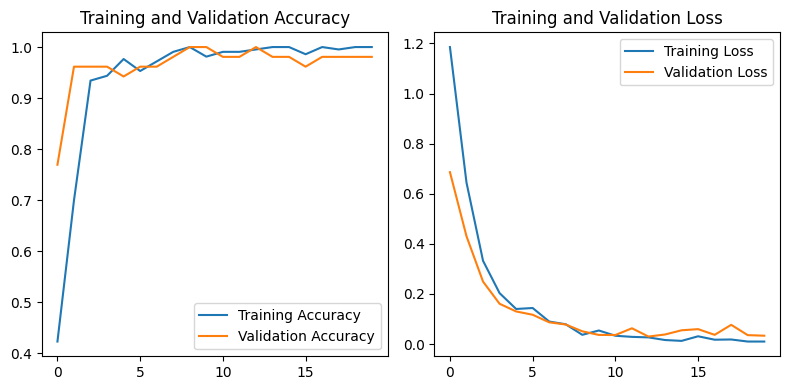

In [10]:
def plot_training_history(history):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Download sample images

In [11]:
!wget https://i.imgflip.com/67jakj.jpg -O sample1.jpg
!wget https://slidechef.net/wp-content/uploads/2023/03/mr-incredible-meme.jpg -O sample2.jpg
!wget https://static.wikia.nocookie.net/lol/images/d/d1/Drake-hotline-bling-airplane-seats-memes.jpg -O sample3.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.


# Load model

In [12]:
model = tf.keras.models.load_model('meme_classification_model.h5')

# Define class names

In [13]:
class_names = ['drake', 'incredible', 'spidey']

# Utility Functions

In [14]:
# Load and preprocess the input image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Make predictions and display images
def meme_pred(input_image_path):
    input_image = load_and_preprocess_image(input_image_path)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    confidence = predictions[0][predicted_class] * 100

    plt.imshow(load_img(input_image_path))
    plt.title(f'Predicted Class: {predicted_class_name}\nConfidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

# Test meme predictions

1/1 [==============================] - 0s 148ms/step


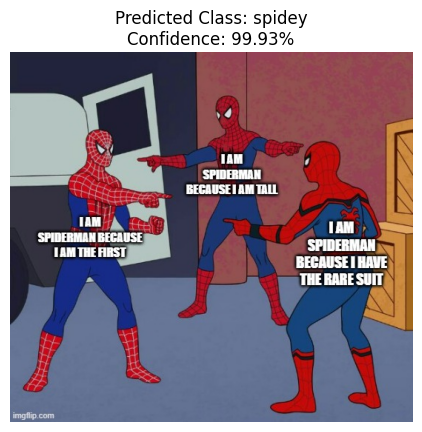

In [15]:
meme_pred('sample1.jpg')

1/1 [==============================] - 0s 81ms/step


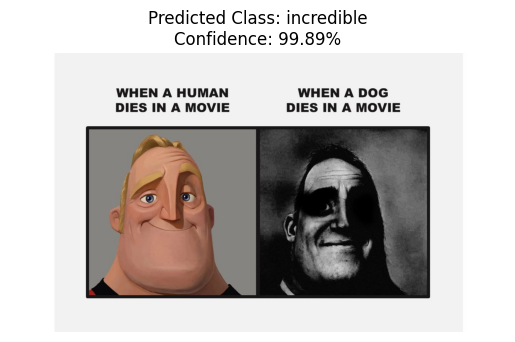

In [16]:
meme_pred('sample2.jpg')

1/1 [==============================] - 0s 48ms/step


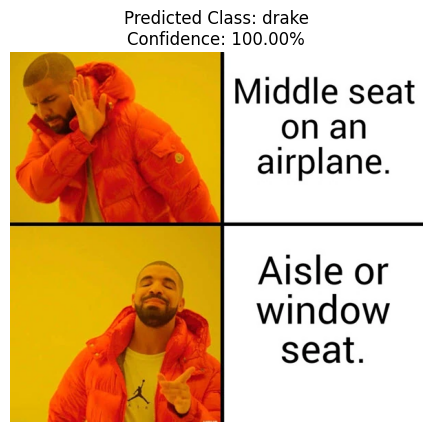

In [17]:
meme_pred('sample3.jpg')

1/1 [==============================] - 0s 50ms/step


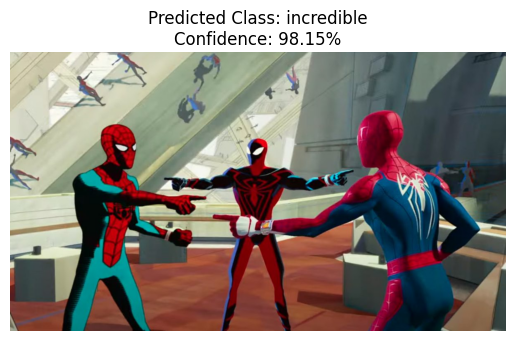

In [19]:
meme_pred('spiderverse.jpg')